MMSegmentation Tutorial:
https://colab.research.google.com/github/open-mmlab/mmsegmentation/blob/master/demo/MMSegmentation_Tutorial.ipynb#scrollTo=bDcs9udgunQK

## Install MMSegmentation
This step may take several minutes. 

We use PyTorch 1.5.0 and CUDA 10.1 for this tutorial. You may install other versions by change the version number in pip install command. 

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# Install PyTorch
!pip install -U torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
# Install MMCV
!pip install mmcv-full==latest+torch1.5.0+cu101 -f https://download.openmmlab.com/mmcv/dist/index.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 703.8MB 26kB/s 
     |████████████████████████████████| 6.6MB 37.4MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.5.0+cu101 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
Looking in links: https://download.openmmlab.com/mmcv/dist/index.html
     |████████████████████████████████| 29.1MB 103kB/s 
     |████████████████████████████████| 194kB 7.3MB/s 


In [3]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 2616, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 2616 (delta 4), reused 9 (delta 1), pack-reused 2597
Receiving objects: 100% (2616/2616), 4.71 MiB | 11.34 MiB/s, done.
Resolving deltas: 100% (1885/1885), done.
/content/mmsegmentation
Obtaining file:///content/mmsegmentation
  Running setup.py develop for mmsegmentation


In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.5.0+cu101 True
0.13.0


## Run Inference with MMSeg trained weight

In [9]:
!rm -rf ./checkpoints
!mkdir ./checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/resnest/deeplabv3plus_s101-d8_512x1024_80k_cityscapes/deeplabv3plus_s101-d8_512x1024_80k_cityscapes_20200807_144429-1239eb43.pth -P ./checkpoints

--2021-05-24 10:55:48--  https://download.openmmlab.com/mmsegmentation/v0.5/resnest/deeplabv3plus_s101-d8_512x1024_80k_cityscapes/deeplabv3plus_s101-d8_512x1024_80k_cityscapes_20200807_144429-1239eb43.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265945854 (254M) [application/octet-stream]
Saving to: ‘./checkpoints/deeplabv3plus_s101-d8_512x1024_80k_cityscapes_20200807_144429-1239eb43.pth’

deeplabv3plus_s101- 100%[===================>] 253.62M  13.4MB/s    in 24s     

2021-05-24 10:56:13 (10.4 MB/s) - ‘./checkpoints/deeplabv3plus_s101-d8_512x1024_80k_cityscapes_20200807_144429-1239eb43.pth’ saved [265945854/265945854]



In [12]:
!ls checkpoints

deeplabv3plus_s101-d8_512x1024_80k_cityscapes_20200807_144429-1239eb43.pth


In [14]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
config_file = 'configs/resnest/deeplabv3plus_s101-d8_512x1024_80k_cityscapes.py'
checkpoint_file = 'checkpoints/deeplabv3plus_s101-d8_512x1024_80k_cityscapes_20200807_144429-1239eb43.pth'

In [18]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

Use load_from_local loader


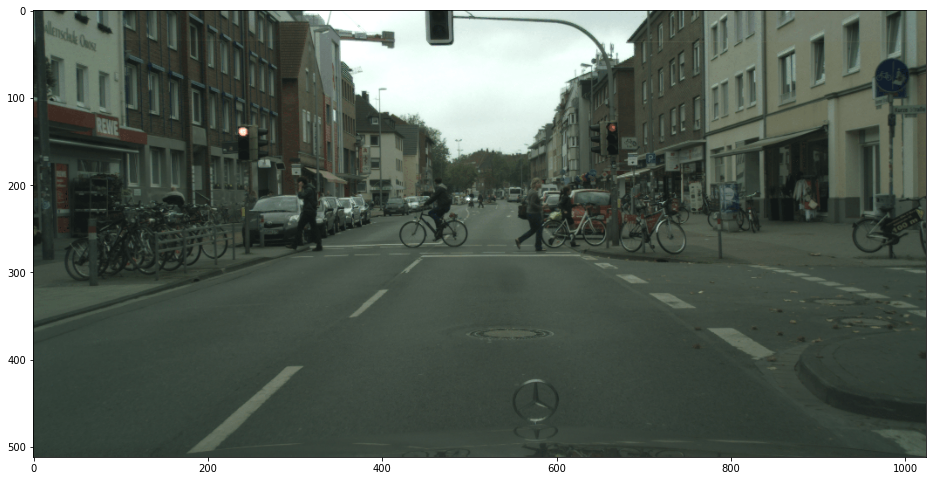

In [19]:
# demo
img_path = 'demo/demo.png'
figsize(16, 16)
img = mpimg.imread(img_path)
plt.imshow(img)

In [20]:
# test a single image
result = inference_segmentor(model, img_path)

/content/mmsegmentation/mmseg/models/segmentors/base.py:271: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


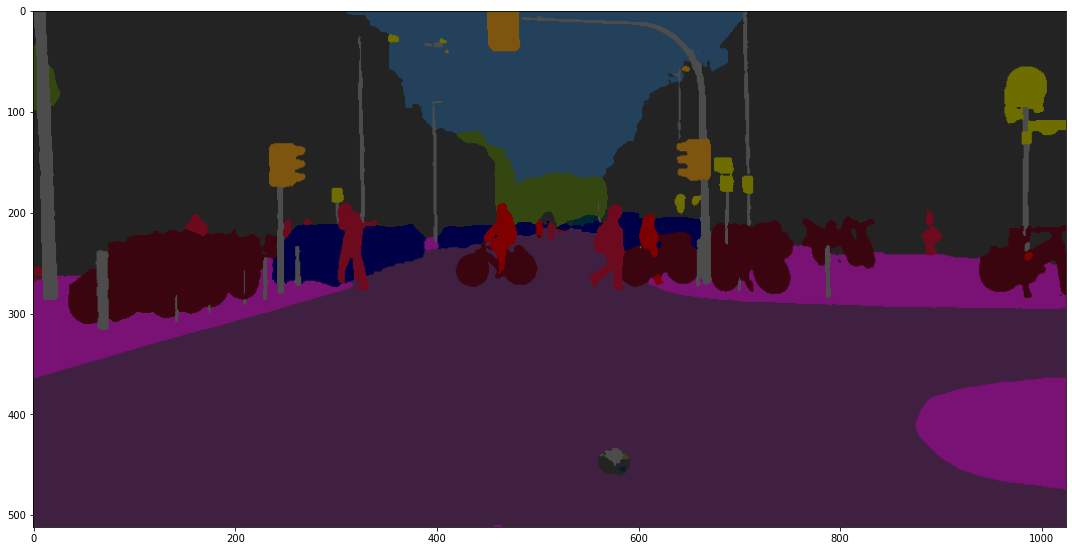

In [21]:
# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes'))

## Now let's test if it's any good for faces

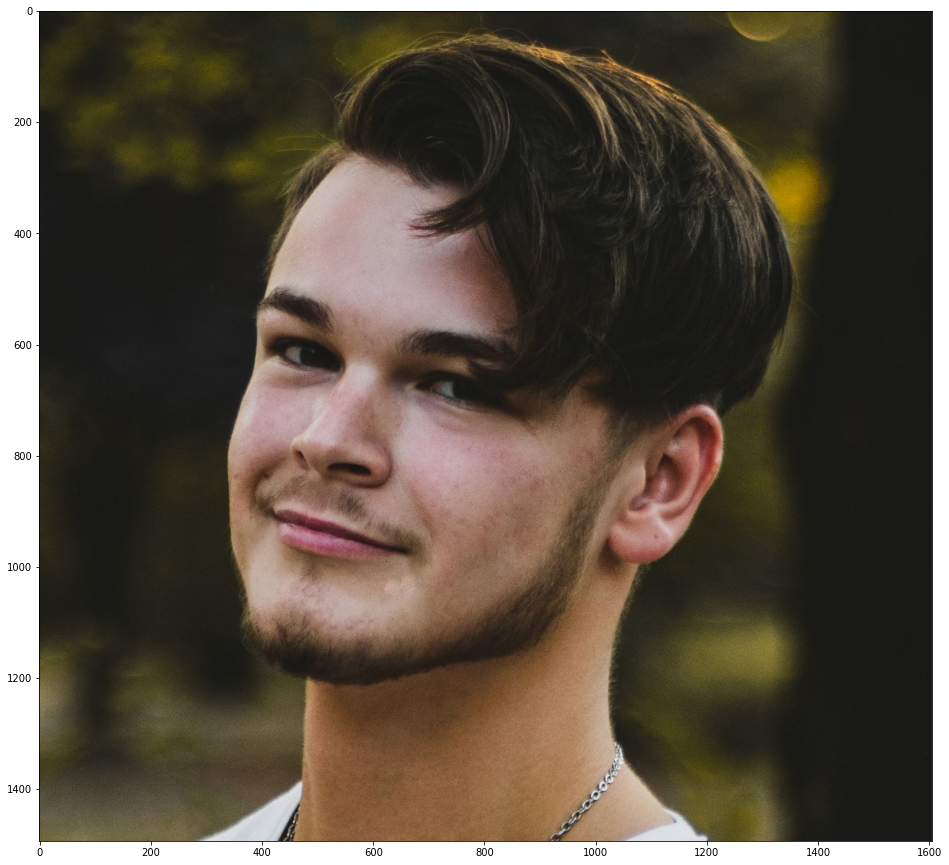

In [26]:
# demo
img_path = 'demo/face.jpg'
figsize(16, 16)
img = mpimg.imread(img_path)
plt.imshow(img)

In [27]:
# test a single image
result = inference_segmentor(model, img_path)

/content/mmsegmentation/mmseg/models/segmentors/base.py:271: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


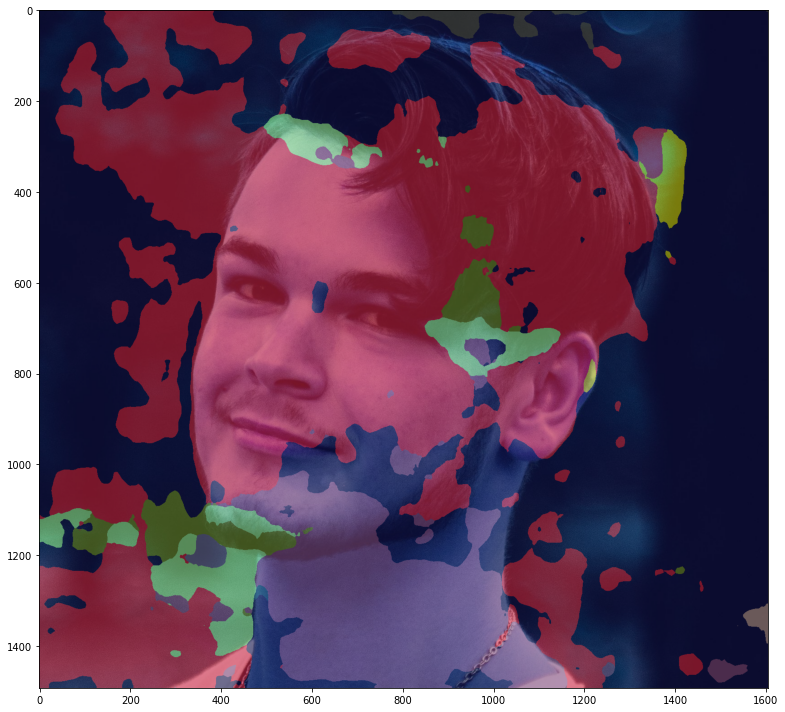

In [28]:
# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes'))

Well it sucks. We need to fine-tune some model to do a face segmentation.